# Training model

## Linear Regression

Tên tiếng việt gọi là hồi quy tuyến tính, và đúng như tên thì đây là một hàm tuyến tính

Linear regression model prediction:

$$\hat y = \theta_0 + \theta_1.x_1 + \theta_2.x_2 + ... + \theta_n.x_n$$

Trong đó:

- $\hat y$ là giá trị dự đoán
- $n$ là số lượng features
- $x_i$ là giá trị feature thứ i
- $\theta_j$ là model parameter thứ j trong đó $\theta_0$ là bias

Có thể viết công thức trên dưới dạng vector như sau:


$$\hat y = h_\theta(x) = \theta^T.x$$

Trong đó:

- $\theta$ là vector model parameter, bao gôm cả giá trị bias $\theta_0$ và các feature weight từ $\theta_1$ đến $\theta_n$
- $\theta^T$ là chuyển vị của $\theta$ (vector hàng thay vì vector cột)
- $x$ là giá trị của feature vector từ $x_0$ đến $x_n$ trong đó $x_0$ luôn luôn bằng 1
- $\theta^T.x$ là giá trị nhân vector 
- $h_0$ is hypothesis function, using the model parameters $\theta$

Tranining model là cách chúng ta cải thiện các tham số $\theta$ với mục đích sao cho với các giá trị $\theta$ nhất định thì giá trị ta dự đoán sẽ gần nhất với giá trị thực tế. Dựa vào yêu cầu trên ta có thể xay dựng ra hàm mất mát dựa trên giá trị dự đoán và giá trị thực tế như sau:

_MSE cost function for a Linear Regression model_

$$MSE(\textbf{X}, h_\theta) = \dfrac{1}{m}.\sum_{i=1}^{m} (\theta^T.\textbf{x}^{(i)} - y^{(i)})$$

Với hàm linear thì ta có thể tìm ra $\theta$ bằng tính toán thông thường như sau:

$$\hat\theta = (\textbf{X}^T.\textbf{X})^{-1}.\textbf{X}^T .y$$

Xét ví dụ cho hàm linear:

$$y = 3x + 4$$

Ta sẽ cho thêm nhiễu vào bằng cách cộng thêm `np.random.rand(100,1)`

In [9]:
import numpy as np
import numpy.random as random

random.seed(2910)

X = 2* np.random.rand(100, 1)
y = 4 + 3*X + np.random.rand(100,1)

Text(0, 0.5, 'y')

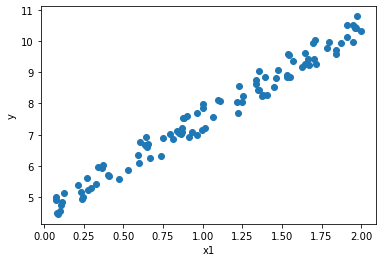

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X, y)
plt.xlabel("x1",)
plt.ylabel("y")

Tìm ra $\theta$ bằng tính toán thông thường

Tính $(\textbf{X}^T.\textbf{X})$

In [11]:
X_b = np.c_[np.ones((100, 1)), X]

X_b_T = X_b.T

theta = np.linalg.inv(X_b_T.dot(X_b)).dot(X_b_T).dot(y)

theta_0, theta_1 = theta[0][0],theta[1][0] 

theta_0, theta_1


(4.544707357438557, 2.9639931493249914)

Vậy có thể dự đoán $y=\theta.X$ hay $y=4.54470 + 2.96x_i$

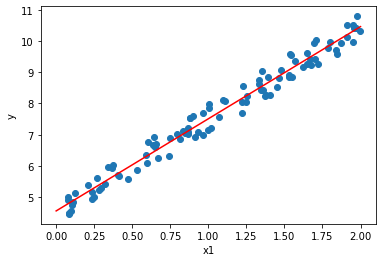

In [12]:
def fx(x):
    return theta_0 + theta_1*x

plt.scatter(X, y)
plt.xlabel("x1",)
plt.ylabel("y")
plt.plot([0, 2], [fx(x) for x in [0,2]],'r-')

Thử dự đoán với model LinearRegression lib của sklearn

In [13]:
from sklearn.linear_model import LinearRegression

linear_reg_clf = LinearRegression()

linear_reg_clf.fit(X, y)


LinearRegression()

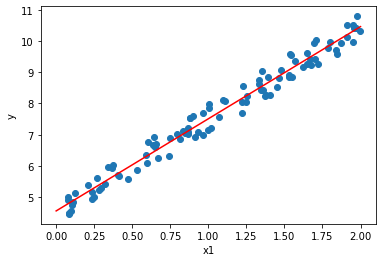

In [14]:
plt.scatter(X, y)
plt.xlabel("x1",)
plt.ylabel("y")
plt.plot([0, 2], [linear_reg_clf.predict([x])[0][0] for x in [[0],[2]]],'r-')

**Độ phức tạp của thuật toán (Computational Complexity):**

Độp hức tạp của thuật toán này là $O(n^{2.4})$ đến $O(n^3)$

## Gradient Descent

_Gradient Descent_ là một thuật toán tối ưu hóa rất phổ biến với khả năng tìm ra solution tối ưu cho rất nhiều bài toán. Ý tưởng tổng quan của _Gradient Descent_ là điều chỉnh parameters sau từng vòng lặp để tối thiểu hóa cost function.

Đọc chi tiết thuật toán tại [Machine Learning cơ bản](https://machinelearningcoban.com/2017/01/12/gradientdescent/)

Hai tham số phải chú ý của GD đó là `learning rate` và `epochs`. Hai giá trị này phải chọn phù hợp, không được quá to và cũng không được quá bé.

Nếu như chọn learning rate vừa phải thì mô hình sẽ hội tụ sau một số epochs nhất định:

![](../../../imgs/gd_1.png)

Chọn learning rate quá nhỏ sẽ dẫn đến mô hình lâu hội tụ hơn => mất thời gian tính toán

![](../../../imgs/gd_2.png)

Chọn learning rate quá lớn dẫn đến việc mô hình quanh quẩn tại điểm cực tiểu mà mãi không hội tụ

![](../../../imgs/gd_1.png)

Trong quá trình training hàm số mà ta khảo sát không phải lúc nào cũng chỉ có duy nhất một cực trị mà hầu như là sẽ có nhiều điểm cực trị, trong đó có những điểm làm đạo hàm bằng không được gọi là `local minimum` và điểm cho hàm số bé nhất - `Global minimum`, cái ta cần tìm chính là `Global minimum`. 

Vấn đề đặt ra đối với các mô hình như trên đó là model có thể bị kẹt tại `local minimum`

![](../../../imgs/gd_4.png)

Thực tế, hàm mất mắt có hình dạng của cái bát ô tô- hình tròn nếu như các features có scale giống nhau( ví dụ như cùng nằm trong khoảng 0 -1). Nếu như các features có scale khác nhau thì hình dáng của hàm cost sẽ dài ra như hình ellipse

Hình dưới đây mô tả hình dạng của cost function khi 2 features có cùng scale (hình bên trái) và khi feature 1 có giá trị nhỏ hơn nhiều so với feature 2

![](../../../imgs/gd_5.png)

### Batch Gradient Descent 

Đây là thuật toán Gradient Descent tính đạo hàm của hàm mất mát trên toàn bộ các điểm dữ liệu và theo toàn bộ các parameter $\theta_j$. Giả sử model có bộ tham số $\theta$ là $[\theta_1, \theta_2, ...\theta_n]$ thì ta sẽ cần phải tính đạo hàm của hàm cost theo từng $\theta_j$ và tính trên toàn bộ tập dữ liệu như sau:

_Ví dụ với hàm MSE_

![](../../../imgs/mse_1.png)

Và công thức viết gọn lại sẽ là:

![](../../../imgs/mse_2.png)

Công thức cập nhật parameter của Batch Gradient Descent sau mỗi vòng lặp sẽ là :

$$\theta^{(next step)} = \theta - \eta.\bigtriangledown_{\theta}.MSE(\theta)$$

Trong đó $\eta$ là learning rate

Thực hiện tính toán $\theta$ bằng gradient descent

In [82]:
import numpy as np

np.random.seed(2910)

# Learning rate
eta = 0.1
# 
n_iters = 1000
m = 100

# Init theta
theta = np.random.randn(2, 1)

# plotting:
theta_arr = []
for iter in range(n_iters):
    grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta*grad
    temp = theta.copy()
    theta_arr.append(temp)
def training(theta=theta, eta=eta, n_iters=n_iters):
    for iter in range(n_iters):
        grad = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta*grad
        temp = theta.copy()
        theta_arr.append(temp)
        
def plot(theta_arr):
    plt.scatter(X, y)
    plt.xlabel("x1",)
    plt.ylabel("y")
    for theta_i in theta_arr:
        plt.plot([0, 2], [(theta_i[0,0] + theta_i[1,0]*x) for x in [0,2]],'r-')
    plt.show()

theta

array([[4.54470736],
       [2.96399315]])

Xem một vài ví dụ với $\theta$ tìm được khi thay đổi learning rate ($\eta$) và áp dụng cho 10 lần lặp

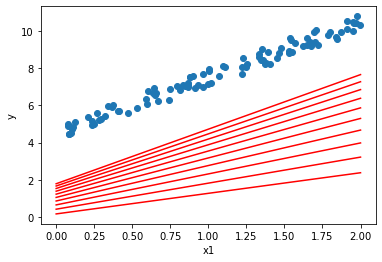

In [83]:
theta_arr = []
theta = np.random.randn(2, 1)
training(theta=theta,eta=0.02, n_iters=10)
plot(theta_arr)

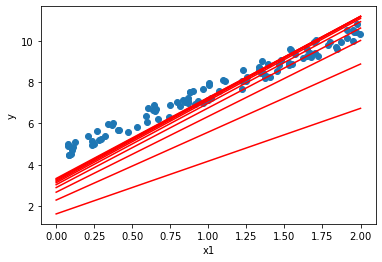

In [84]:
theta_arr = []
theta = np.random.randn(2, 1)
training(theta=theta,eta=0.1, n_iters=10)
plot(theta_arr)

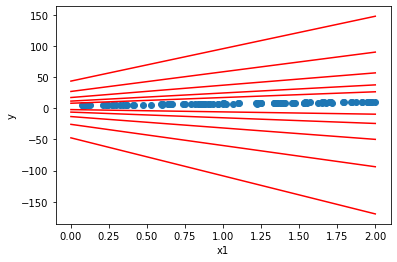

In [85]:
theta_arr = []
theta = np.random.randn(2, 1)
training(theta=theta,eta=0.5, n_iters=10)
plot(theta_arr)

### Stochastic Gradient Descent

Khác với batch gradient descent là tính toán gradient trên toàn bộ tập dữ liệu thì SGD chỉ thực hiện tính toán trên một điểm dữ liệu được chọn ra ngẫu nhiên từ tập dữ liệu

Lợi ích của việc sử dụng SGD đó là sẽ có tốc độ nhanh hơn so với Batch GD, tuy nhiên do tính ngẫu nhiên (ngẫu nhiên chọn ra điểm dữ liệu để thực hiện tính toán gradient) cho nên thay vì làm hàm cost function luôn đi xuống thì ta sẽ có giá trị của hàm này tăng lên, giảm xuống ngẫu nhiên... cho nến nó sẽ đi zik zak mặc dù khá gần với cực tiểu rồi.

=> Điều này là không tốt lắm với mong muốn hội tụ

![](../../../imgs/gd_6.png)

Mà ta biết răng tốc độ hội tụ thì phụ thuộc cả vào learning rate cho nên ta có thể dùng một dạng regularize đó là learning rate schedule, tức là càng đến các epoch cao/ epoch cuối thì learning rate sẽ càng nhỏ => giúp thuật toán hội tụ tốt hơn

In [87]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta*grad

theta

array([[4.55407548],
       [2.96841105]])

Sử dụng `SGDRegressor` của sklearn, trong đó `.intercept_` là paramter của hệ số tự do (bias) còn `.coef_` là parameter của các weight $\theta$

In [90]:
from sklearn.linear_model import  SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.54640215]), array([2.96676522]))

### Mini-batch Gradient Descent

Ý tưởng của thuật toán này đó là chia tập training ra thành các mini-batch (ví dụ 1000 data chia ra làm 10 mini-batch, mỗi batch có 10 data).

Mỗi epoch sẽ duyệt qua lần lượt các mini-batch và thực hiện bath gradient descent trên từng mini-batch này, tức là việc tính toán gradient trên toàn bộ dữ liệu của tập mini-batch

## Polynomial Regression

Hàm số $y = f(x) = w^T.x$ là một hàm tuyến tính theo cả w và x. Trên thực tế, Linear Regression có thể áp dụng cho các mô hình chỉ cần tuyến tính theo w. Ví dụ:

$$y = w_1.x_1 + w_2.x_2 + w_3.x_1^2 + w_4.sin(x_2) + w_5.x_1.x_2 + w_0$$

Là một hàm tuyến tính theo $w$ vì vậy cũng có thể giải bằng Linear Regression. Với mỗi dữ liệu đầu vào $x = [x_1;x_2]$, chúng ta tính toán dữ liệu mới $x = [x_1, x_2, x_1^2,sin(x_2), x_1.x_2]$ rồi áp dụng Linear Regression với dữ liệu mới này.

Ví dụ

In [182]:
import numpy as np

np.random.seed(2910)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

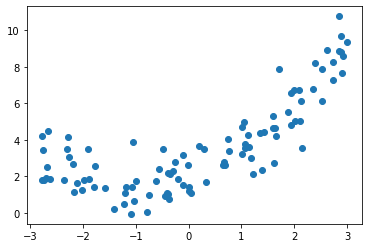

In [183]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(X, y)

plt.show()

Đầu bài cho ta hình dạng của dữ liệu là dạng cong kiểu parabol => dự đoán răng hàm f(x) của ta sẽ có dạng $w_2.x^2 + w_1.x + w_0 + noise$. Như vậy đây là bài toán tuyến tính chỉ cho $w$, ta có thể áp dụng biến đổi features thành [x, x^2].

In [193]:
# Adding feature
X_bar = np.array([np.array([1, item[0], (item**2)[0]])for item in X])
y_ = y.reshape(m, -1)

# init theta
w = np.random.rand(3).reshape(3,-1)
eta = 0.01
epochs = 1000

print(f"X shape: {X_bar.shape}")
print(f"y shape: {y_.shape}")
print(f"w shape: {w.shape}")
# training with Gradient descent
for epoch in range(epochs):
    # loss
    
    # gradient
    grad = 1/m * X_bar.T.dot(X_bar.dot(w) - y_)
    
    # update weight
    w -=eta * grad
    
print(w)

X shape: (100, 3)
y shape: (100, 1)
w shape: (3, 1)
[[1.97302727]
 [0.96608672]
 [0.48487314]]


Vậy ta có hàm cần tìm là $0.48.x^2 + 0.97.x + 1.97$

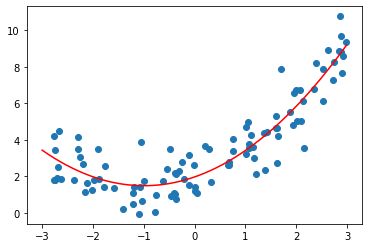

In [194]:
def fx(x):
    return w[0][0] + w[1][0]*x + w[2][0]*(x**2)

x_line = np.arange(-3, 3, 0.01)
y_line = np.array([fx(x) for x in x_line])

x_line.shape, y_line.shape

plt.scatter(X, y)
# Visualize line
plt.plot(x_line, y_line, color='r')

plt.show()


Ta có thể sử dụng `PolynomialFeatures` của sklearn để thực hiện thêm feature cho dữ liệu rồi sau đó thực hiện `LinearRegression` như thường

In [195]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(f"X : {X[0]}")

print(f"X poly: {X_poly[0]}")

X : [1.38605963]
X poly: [1.38605963 1.92116131]


In [196]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.99089046]), array([[0.96629489, 0.48158395]]))

Kết quả:

- Hàm ban đầu: $0.5.x^2 + x + 2 + noise$
- Hàm dự đoán: $0.48.x^2 + 0.97.x + 1.99$

## Learning Curves


So sánh Linear Regression với 3 model:

- tập train là tập nguyên thủy, có 1 feature - `model 1`
- tập train là tập thêm 1 feature nữa là bình phương của feature ban đầu - `model 2`
- tập train được thêm -> 300 feature - `model 3`

![](../../../imgs/learning_curve.png)

Ta thấy rằng:

- `model 1` underfitting
- `model 2` fit well
- `model 3` overfitting

Tuy nhiên trong thực tế ta không biết được dạng hàm tuyến tính cần tìm => không thể trực tiếp chọn được ngay cách thêm features như các ví dụ trên. Ta có thể dùng 

## Regularized Linear Models

## Logistic Regression
